# GF($2^m$) Multiplication

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `GF2Multiplication`
Out of place multiplication over GF($2^m$).

The bloq implements out of place multiplication of two quantum registers storing elements
from GF($2^m$) using construction described in Ref[1], which extends the classical construction
of Ref[2].

To multiply two m-bit inputs $a = [a_0, a_1, ..., a_{m-1}]$ and $b = [b_0, b_1, ..., b_{m-1}]$,
the construction computes the output vector $c$ via the following three steps:
    1. Compute $e = U.b$ where $U$ is an upper triangular matrix constructed using $a$.
    2. Compute $Q.e$ where $Q$ is an $m \times (m - 1)$ reduction matrix that depends upon the
        irreducible polynomial $P(x)$ of the galois field $GF(2^m)$. The i'th column of the
        matrix corresponds to coefficients of the polynomial $x^{m + i} % P(x)$. This matrix $Q$
        is a linear reversible circuit that can be implemented only using CNOT gates.
    3. Compute $d = L.b$ where $L$ is a lower triangular matrix constructed using $a$.
    4. Compute $c = d + Q.e$ to obtain the final product.

Steps 1 and 3 are performed using $n^2$ Toffoli gates and step 2 is performed only using CNOT
gates.

#### Parameters
 - `bitsize`: The degree $m$ of the galois field $GF(2^m)$. Also corresponds to the number of qubits in each of the two input registers $a$ and $b$ that should be multiplied.
 - `plus_equal_prod`: If True, implements the `PlusEqualProduct` version that applies the map $|x\rangle |y\rangle |z\rangle \rightarrow |x\rangle |y\rangle |x + z\rangle$. 

#### Registers
 - `x`: Input THRU register of size $m$ that stores elements from $GF(2^m)$.
 - `y`: Input THRU register of size $m$ that stores elements from $GF(2^m)$.
 - `result`: Register of size $m$ that stores the product $x * y$ in $GF(2^m)$. If plus_equal_prod is True - result is a THRU register and stores $result + x * y$. If plus_equal_prod is False - result is a RIGHT register and stores $x * y$.  

#### References
 - [On the Design and Optimization of a Quantum Polynomial-Time Attack on Elliptic Curve Cryptography](https://arxiv.org/abs/0710.1093). 
 - [Low complexity bit parallel architectures for polynomial basis multiplication over GF(2m)](https://ieeexplore.ieee.org/abstract/document/1306989). 


In [2]:
from qualtran.bloqs.gf_arithmetic import GF2Multiplication

### Example Instances

In [3]:
gf16_multiplication = GF2Multiplication(4, plus_equal_prod=True)

In [4]:
import sympy

m = sympy.Symbol('m')
gf2_multiplication_symbolic = GF2Multiplication(m, plus_equal_prod=False)

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([gf16_multiplication, gf2_multiplication_symbolic],
           ['`gf16_multiplication`', '`gf2_multiplication_symbolic`'])

### Call Graph

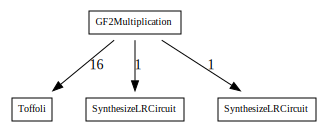

#### Counts totals:
 - `SynthesizeLRCircuit`: 1
 - `SynthesizeLRCircuit`: 1
 - `Toffoli`: 16

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
gf16_multiplication_g, gf16_multiplication_sigma = gf16_multiplication.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gf16_multiplication_g)
show_counts_sigma(gf16_multiplication_sigma)

## `MultiplyPolyByConstantMod`
Multiply a polynomial by $f(x)$ modulu $m(x)$. Both $f(x)$ and $m(x)$ are constants.

#### Parameters
 - `f_x`: The polynomial to mulitply with, given either a galois.Poly or as a sequence degrees.
 - `m_x`: The modulus polynomial, given either a galois.Poly or as a sequence degrees. 

#### Registers
 - `g`: The polynomial coefficients (in GF(2)). 

#### References
 - [Space-efficient quantum multiplication of polynomials for binary finite fields with     sub-quadratic Toffoli gate count](https://arxiv.org/abs/1910.02849v2). Algorithm 1


In [7]:
from qualtran.bloqs.gf_arithmetic import MultiplyPolyByConstantMod

### Example Instances

In [8]:
fx = [2, 0]  # x^2 + 1
mx = [0, 1, 3]  # x^3 + x + 1
gf2_multiply_by_constant_modulu = MultiplyPolyByConstantMod(fx, mx)

#### Graphical Signature

In [9]:
from qualtran.drawing import show_bloqs
show_bloqs([gf2_multiply_by_constant_modulu],
           ['`gf2_multiply_by_constant_modulu`'])

### Call Graph

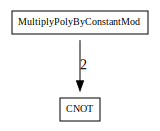

#### Counts totals:
 - `CNOT`: 2

In [10]:
from qualtran.resource_counting.generalizers import ignore_split_join
gf2_multiply_by_constant_modulu_g, gf2_multiply_by_constant_modulu_sigma = gf2_multiply_by_constant_modulu.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(gf2_multiply_by_constant_modulu_g)
show_counts_sigma(gf2_multiply_by_constant_modulu_sigma)